In [1]:
using LinearAlgebra
using Plots
using Plots.PlotMeasures

In [22]:
λ = 10; e_ħ = 0.4;
function Mₙ(R::Vector{Float64})
    return [sin(2π*R[1]/λ),cos(2π*R[1]/λ),0]
end
function Mᵦ(R::Vector{Float64})
    return [0,cos(2π*R[1]/λ),sin(2π*R[1]/λ)]
end

function Ψₙ(R::Vector{Float64},η::Int=1)
    k = -η*e_ħ*Mₙ(R)
    return exp(im*k⋅R)
end

function Ψᵦ(R::Vector{Float64},η::Int=1)
    k = -η*e_ħ*Mᵦ(R)
    return exp(im*k⋅R)
end

function addΨ(f::Function,η::Int, nG::int=5)
    function plot(x::Float64,y::Float64)
        return sumf([x,y,0],η)
    end
    return plot
end

function pΨ(f::Function,η::Int)
    function plot(x::Float64,y::Float64)
        return f([x,y,0],η)
    end
    return plot
end

pΨ (generic function with 1 method)

In [23]:
Ψn = pΨ(Ψₙ,1)
Ψb = pΨ(Ψᵦ,1)
xlim = 3*λ; ylim = 20; dx = 0.1; dy = 0.2
plotΨ(Ψ::Function,Ψtitle::String) = plot(
    heatmap(-5:dx:xlim,-ylim:dy:ylim, angle∘Ψ, c=:hsv, title = Ψtitle*" ∠Ψ (Radians)"),
    heatmap(-5:dx:xlim,-ylim:dy:ylim, real∘Ψ, c=:bwr, title = Ψtitle* "Re(Ψ)"), 
    size=(950,400),xlabel="X Position (nm)",ylabel="Y Position (nm)",margin=5mm)

plotΨ (generic function with 1 method)

# A solution for 
# $\langle \hat{H} \rangle = 0 = v_f \vec{\sigma}\cdot (\eta \vec{p} -\frac{e}{\hbar}\vec{A}) $ #

$ = \beta \begin{bmatrix}
\eta k_z - \gamma M_z & \eta k_x - \gamma M_x - i(\eta k_y - \gamma M_y) \\
\eta k_x - \gamma M_x +i(\eta k_y - \gamma M_y) & -\eta k_z - \gamma M_z  
\end{bmatrix} )$ 

# $\exists$ a trivial solution for $|\Psi\rangle = e^{ik\cdot R}\vec{U}(r) $ if #

# $\eta \vec{k} -\frac{e}{\hbar}\vec{A} = 0;$ #
# $\vec{k}= \eta \frac{e}{\hbar}\vec{A} $ #
# So, plot $e^{ik_{B,N}\cdot R}$ #

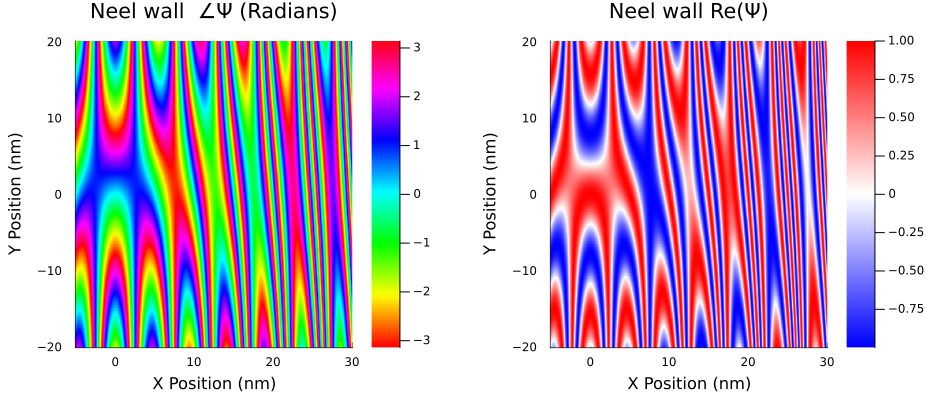

In [20]:
plotΨ(Ψn,"Neel wall ")

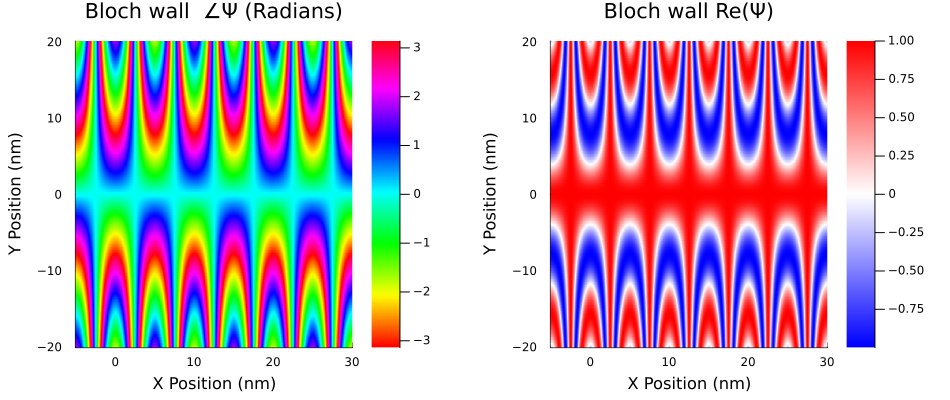

In [21]:
plotΨ(Ψb,"Bloch wall ")

So the Neel wall envelope function is aperiodic with the magnetic lattice (of period λ = 10), while the bloch wall case would appear to inherently obey bloch's theorem. Maybe some clever linear combination of neel wall wfcs would obey bloch's theorem?